   CreditAmount        Income  Age EmploymentStatus CreditHistory  Approval
0  19352.465824  19328.159955   45         Employed          Good      True
1  47585.001014  54648.193790   24         Employed          Good      True
2  36867.703149  87421.637752   52       Unemployed           Bad      True
3  30334.265726  73490.263755   45       Unemployed           Bad      True
4   8644.913382  80849.553638   31       Unemployed           Bad      True
Розмір тренувального набору: 800 спостережень
Розмір тестового набору: 200 спостережень
Модель логістичної регресії навчена успішно.
Точність моделі: 0.72
Матриця неправильно класифікованих прикладів:
[[  3  29]
 [ 26 142]]
Звіт про класифікацію:
              precision    recall  f1-score   support

       False       0.10      0.09      0.10        32
        True       0.83      0.85      0.84       168

    accuracy                           0.73       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.71  

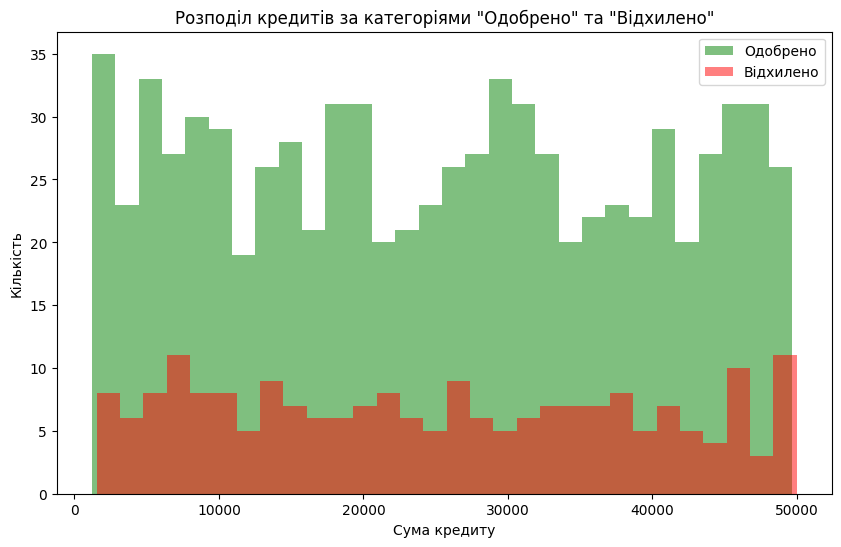

['credit_approval_model.joblib']

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import joblib


# Налаштування для відтворюваності результатів
np.random.seed(42)

# Генерація випадкових числових ознак
num_samples = 1000
credit_amount = np.random.uniform(1000, 50000, num_samples)
income = np.random.uniform(1000, 100000, num_samples)
age = np.random.randint(18, 65, num_samples)

# Генерація випадкових категорійних ознак
employment_status = np.random.choice(['Employed', 'Unemployed', 'Self-Employed'], num_samples)
credit_history = np.random.choice(['Good', 'Bad', 'No Credit'], num_samples)

# Створення DataFrame
data = pd.DataFrame({
    'CreditAmount': credit_amount,
    'Income': income,
    'Age': age,
    'EmploymentStatus': employment_status,
    'CreditHistory': credit_history
})

# Генерація вектора цільової змінної (відповіді)
data['Approval'] = np.random.choice([False, True], num_samples, p=[0.2, 0.8])

# Розділення на ознаки (X) та цільову змінну (y)
X = data.drop('Approval', axis=1)
y = data['Approval']

# One-hot encoding категорійних ознак
X_encoded = pd.get_dummies(X, columns=['EmploymentStatus', 'CreditHistory'], drop_first=True)

# Розділення на тренувальний та тестовий набори (80% тренування, 20% тестування)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Створення моделі логістичної регресії
model = LogisticRegression(random_state=42)

# Навчання моделі на тренувальних даних
model.fit(X_train, y_train)

# Виведення перших рядків набору даних
print(data.head())

# Виведення розмірів тренувального та тестового наборів
print(f"Розмір тренувального набору: {X_train.shape[0]} спостережень")
print(f"Розмір тестового набору: {X_test.shape[0]} спостережень")

print("Модель логістичної регресії навчена успішно.")

# Визначення ваг класів
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Створення моделі логістичної регресії з вагами класів
model = LogisticRegression(random_state=42, class_weight={False: class_weights[0], True: class_weights[1]})

# Навчання моделі на тренувальних даних
model.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred = model.predict(X_test)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {accuracy:.2f}")

# Будуємо матрицю неправильно класифікованих прикладів
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матриця неправильно класифікованих прикладів:")
print(conf_matrix)

# Звіт про класифікацію
class_report = classification_report(y_test, y_pred)
print("Звіт про класифікацію:")
print(class_report)

# Розділення даних на "одобрено" та "відхилено"
approved = data[data['Approval'] == True]['CreditAmount']
rejected = data[data['Approval'] == False]['CreditAmount']

# Побудова графіка розподілу
plt.figure(figsize=(10, 6))
plt.hist(approved, bins=30, alpha=0.5, label='Одобрено', color='green')
plt.hist(rejected, bins=30, alpha=0.5, label='Відхилено', color='red')

plt.title('Розподіл кредитів за категоріями "Одобрено" та "Відхилено"')
plt.xlabel('Сума кредиту')
plt.ylabel('Кількість')
plt.legend()
plt.show()

# Шлях до файлу, де буде збережена модель
model_filename = 'credit_approval_model.joblib'

# Збереження моделі
joblib.dump(model, model_filename)
